# <font color=blue>Modelo de Regresión Lineal</font>

Ejemplo de éste modelo, aplicado a un conjunto de datos de diabetes proporcionado por sklearn.

Importamos la libreria de sklearn.

modelo lineal --> <font color=red>linear_model</font>

error cuadratico medio --> <font color=red>mean_squared_error</font>  (una metrica para observar el error)

dividimos nuestro conjunto de datos en: un grupo (parte) para entrenamiento y otro mas pequeño para prueba --> <font color=red>train_test_split</font>



Utilizar las librerias basicas


In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()

In [3]:
# inserta una nueva dimensión y selecciona la tercera columna

y = diabetes.target
X = diabetes.data[:,np.newaxis,2] 
print(diabetes.data.shape)
print(diabetes.data[:,2].shape)
print(diabetes.data[:,np.newaxis,2].shape)

(442, 10)
(442,)
(442, 1)


In [4]:
# dividir el conjunto de datos en:
#     subconjunto de datos de entrenamiento 
#     subconjunto de datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 1)
(111, 1)
(331,)
(111,)


331 para entrenamiento y 111 para prueba

In [17]:
# obtener una instancia de LinearRegression
linear_regression = linear_model.LinearRegression()

# crea el modelo utilizando los datos de entrenamiento   
linear_regression.fit(X_train, y_train) 
# entrenamiento con la regresion lineal

LinearRegression()

In [18]:
y_train_predicted = linear_regression.predict(X_train) # predicción de datos y de entrenamiento
y_test_predicted = linear_regression.predict(X_test)   # predicción de datos y de prueba

In [19]:
# calidad obtenida en el conjunto de datos de entrenamiento
train_MSD = mean_squared_error(y_train, y_train_predicted)
print(train_MSD)
# calidad obtenida en el conjunto de datos de prueba 
# error cuadratico medio
test_MSD = mean_squared_error(y_test, y_test_predicted) 
print(test_MSD)

3878.676127518841
3928.0577759120392


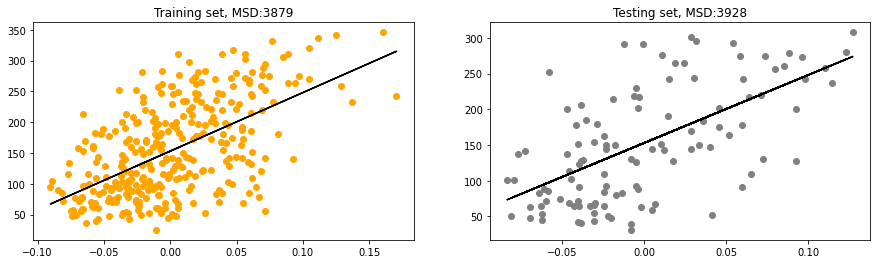

In [20]:
# grafico de resultados del conjunto de entrenamiento y prueba
fig, axs = plt.subplots(1,2, figsize=(15,4)) 

axs[0].scatter(X_train, y_train,  color='orange')
axs[0].plot(X_train, y_train_predicted, color='black')
axs[0].set_title('Training set, MSD:{:.0f}'.format(train_MSD))

axs[1].scatter(X_test, y_test,  color='gray')
axs[1].plot(X_test, y_test_predicted, color='black')
axs[1].set_title('Testing set, MSD:{:.0f}'.format(test_MSD))

plt.show()

de colo amarillo son los datos de entrenamiento y el segundo son datos de prueba

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


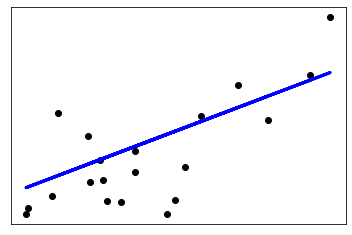

In [21]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()